In [ ]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
dataset = files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [4]:
dataset = pd.read_csv('Google_Stock_Price_Train.csv')
dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
training_set = dataset.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)  

print(X_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_train.shape

(1198, 60, 1)

In [13]:
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential


In [14]:
reg =Sequential()

reg.add(LSTM(units = 50, return_sequences=True, input_shape =(X_train.shape[1], 1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units = 50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))


In [15]:
reg.compile(optimizer = 'adam', loss= 'mean_squared_error')
reg.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 29s 124ms/step - loss: 0.0972
Epoch 2/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0053
Epoch 8/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0052
Epoch 9/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0050
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0051
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0044
Epoch 13/100

In [30]:
dataset_test = pd.read_csv('Google_Stock_Price_Train.csv')
actual_stock_price = dataset_test.iloc[:,1:2].values

In [39]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis =0)
inputs =dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test =[]
for i in range(60,1258):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))


In [40]:
predicted_stock_price = reg.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

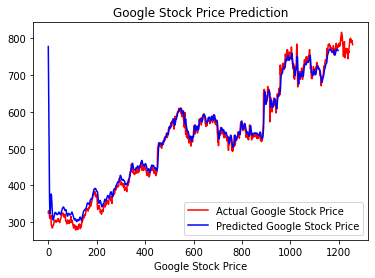

In [41]:
plt.plot(actual_stock_price, color='red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Google Stock Price')
plt.legend()